# BioBERT Model training

If custom models are to be used for Named Entity Recognition (NER), then those models need to be trianed. BioBERT has an excellent tutorial at their github repository: https://github.com/dmis-lab/biobert-pytorch. For our purpose we fine-tuned the original biobert model with HUNER data with some changes. Following are the changes:

## Training Bash script

The training script was changed to include early stopping with 50 epochs. The notable differences from the BioBERT original scripts are because of that. At the end of training the model with the best f1 score was saved. The script is as follows:

```console

export SAVE_DIR=/save/directory/for/the/model/
export DATA_DIR=/path/to/training/datasets/

export MAX_LENGTH=192
export BATCH_SIZE=32
export NUM_STEPS=100
export NUM_EPOCHS=250
export SAVE_STEPS=1000
export ENTITY=HunFlair_cell_all
export SEED=1

python run_ner.py \
    --data_dir ${DATA_DIR}/${ENTITY}/ \
    --labels ${DATA_DIR}/${ENTITY}/labels.txt \
    --model_name_or_path dmis-lab/biobert-base-cased-v1.1 \
    --output_dir ${SAVE_DIR}/${ENTITY}\
    --max_seq_length ${MAX_LENGTH} \
    --num_train_epochs ${NUM_EPOCHS} \
    --evaluation_strategy epoch \
    --per_device_train_batch_size ${BATCH_SIZE} \
    --save_strategy epoch \
    --seed ${SEED} \
    --do_train \
    --do_eval \
    --do_predict \
    --logging_dir ../logs/ \
    --logging_strategy epoch \
    --load_best_model_at_end True \
    --metric_for_best_model loss \
    --warmup_ratio 0.1 \
    --save_total_limit 5 \
    --overwrite_output_dir
```

## Changes to BioBERT run_ner.py script

The run_ner.py script was altered to add early stopping to the training arguments. In the Trainer initialization of the script, the callback was added as follows:

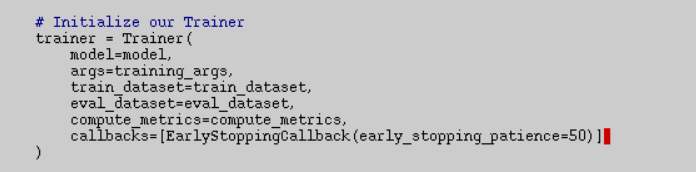